In [87]:
import pandas as pd
import numpy as np
from plotnine import *
pd.options.display.max_rows = 4000

In [88]:
## import dataset into dataframe
%matplotlib inline
df = pd.read_csv('Airline_Delay_Cause.csv')

In [89]:
## Top 5 rows
## Add linear time column
df['time'] = (df['year']-2007)*12+df['month']
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,time
0,2022,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",79.0,12.0,5.34,0.59,...,3.19,0.0,0.0,909.0,384.0,70.0,250.0,0.0,205.0,188
1,2022,8,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,11.0,4.19,0.00,...,2.32,1.0,1.0,675.0,176.0,0.0,231.0,0.0,268.0,188
2,2022,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,4.0,3.18,0.00,...,0.31,0.0,0.0,193.0,158.0,0.0,21.0,0.0,14.0,188
3,2022,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",162.0,15.0,5.36,1.31,...,3.81,1.0,0.0,1110.0,758.0,49.0,149.0,0.0,154.0,188
4,2022,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",123.0,18.0,3.84,1.31,...,8.32,10.0,0.0,984.0,172.0,41.0,313.0,0.0,458.0,188


In [94]:
## Sub-table with total of flights and total minutes delayed
tot_my = df.groupby(['time']).agg({'arr_flights': sum, 'arr_delay':sum}).reset_index()


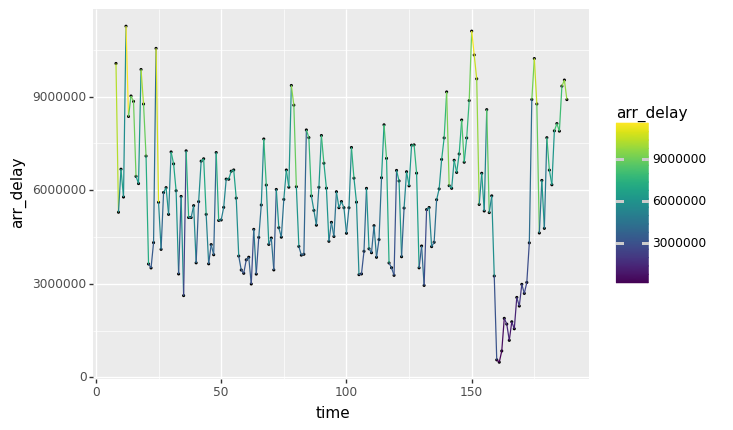

<ggplot: (8789261386301)>

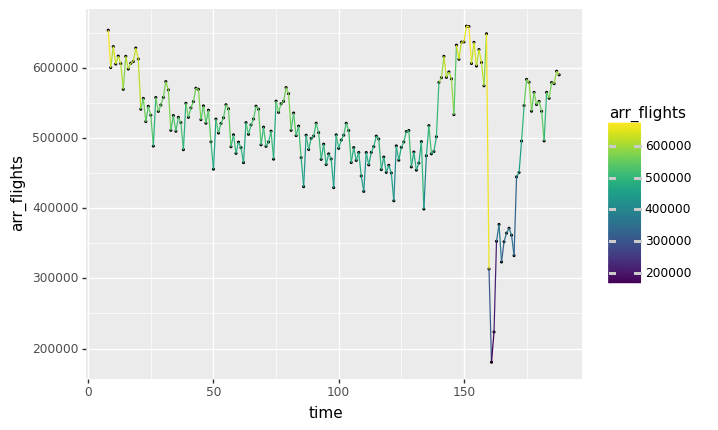

<ggplot: (8789206418649)>

In [123]:
## Before normalization, both of the plots

ggplot(tot_my, aes(x='time', y='arr_delay'))+geom_point(size =0.25)+geom_line(aes(color='arr_delay'))
ggplot(tot_my, aes(x='time', y='arr_flights'))+geom_point(size = 0.25) +geom_line(aes(color='arr_flights'))


In [124]:
## Now finding minutes delayed per flight arrivals
tot_my['MnPrFt'] = tot_my['arr_delay']/tot_my['arr_flights']
tot_my

,time,arr_flights,arr_delay,MnPrFt
0,8,653279.0,10065908.0,15.408283
1,9,600187.0,5294460.0,8.821351
2,10,629992.0,6674331.0,10.594311
3,11,605149.0,5782072.0,9.554791
4,12,616382.0,11261442.0,18.270232
5,13,605765.0,8366662.0,13.811729
6,14,569236.0,9021911.0,15.849157
7,15,616090.0,8849075.0,14.363283
8,16,598126.0,6444535.0,10.774544
9,17,606293.0,6213330.0,10.248065


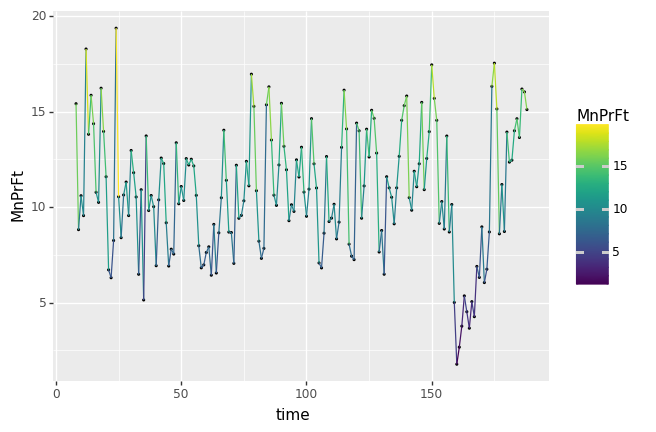

<ggplot: (8789279773880)>

In [125]:
## Plot ratio
ggplot(tot_my, aes(x='time', y='MnPrFt'))+geom_point(size =0.25) +geom_line(aes(color='MnPrFt'))

,time,arr_flights,arr_delay,MnPrFt
121,129,458727.0,3510130.0,7.651893
122,130,479797.0,4210367.0,8.775309
123,131,454162.0,2946976.0,6.488821
124,132,464205.0,5379020.0,11.587596
125,133,494577.0,5444278.0,11.007948
126,134,398713.0,4191095.0,10.511558
127,135,474578.0,4330939.0,9.125874
128,136,517442.0,5696146.0,11.008279
129,137,477393.0,6041754.0,12.655724
130,138,480609.0,6988563.0,14.541057


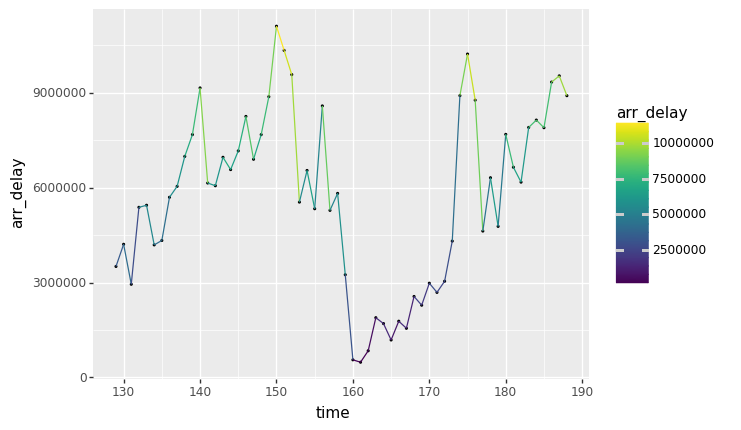

<ggplot: (8789279767890)>

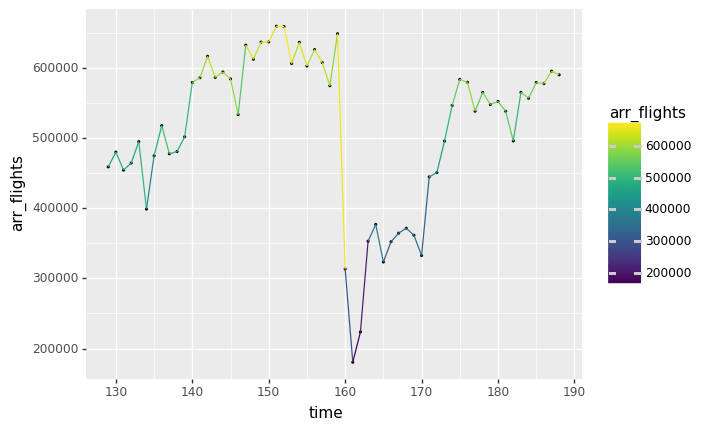

<ggplot: (8789206442662)>

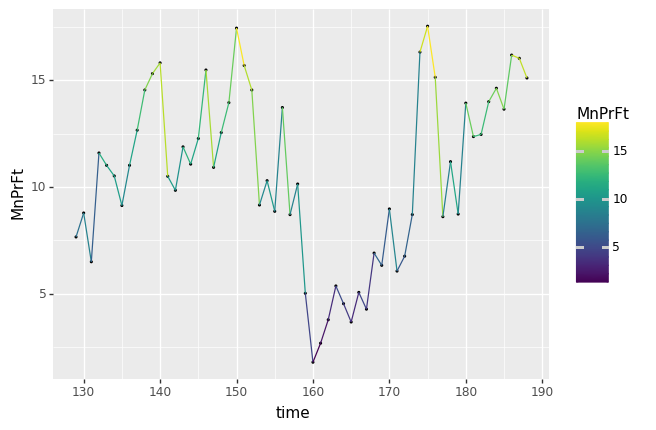

<ggplot: (8789222892150)>

In [126]:
## To focus on time near Covid beginning, repeat the last three graphs for the past 5 years.

Last5 = tot_my[121 : 189]
Last5

ggplot(Last5, aes(x='time', y='arr_delay'))+geom_point(size =0.25)+geom_line(aes(color='arr_delay'))
ggplot(Last5, aes(x='time', y='arr_flights'))+geom_point(size = 0.25) +geom_line(aes(color='arr_flights'))
ggplot(Last5, aes(x='time', y='MnPrFt'))+geom_point(size =0.25) +geom_line(aes(color='MnPrFt'))+facet_wrap()

In [131]:
## year-long segments
ggplot(Last5, aes(x='time', y='MnPrFt'))+geom_point(size =0.25) +geom_line(aes(color='MnPrFt'))

TypeError: unsupported operand type(s) for %: 'list' and 'int'

In [153]:
##functions to print a plot with given intervals
##lower and upper determine an interval of years (from 2007)
def giveMnPrFt(df, lower, upper):
    if (lower > upper): 
        pass
    for i in [lower-1, upper]:
        return(ggplot(tot_my[(i)*12:upper*12], aes(x='time', y='MnPrFt'))+geom_point(size =0.25) +geom_line(aes(color='MnPrFt')))


def givearr_delay(df, lower, upper):
    if (lower > upper): 
        pass
    for i in [lower-1, upper]:
        preturn(ggplot(tot_my[(i)*12:upper*12], aes(x='time', y='arr_delay'))+geom_point(size =0.25)+geom_line(aes(color='arr_delay')))
    pass


def givearr_flights(df, lower, upper):
    if (lower > upper): 
        pass
    for i in [lower-1, upper]:
         return(ggplot(tot_my[(i*12):upper*12], aes(x='time', y='arr_flights'))+geom_point(size = 0.25) +geom_line(aes(color='arr_flights')))
    pass


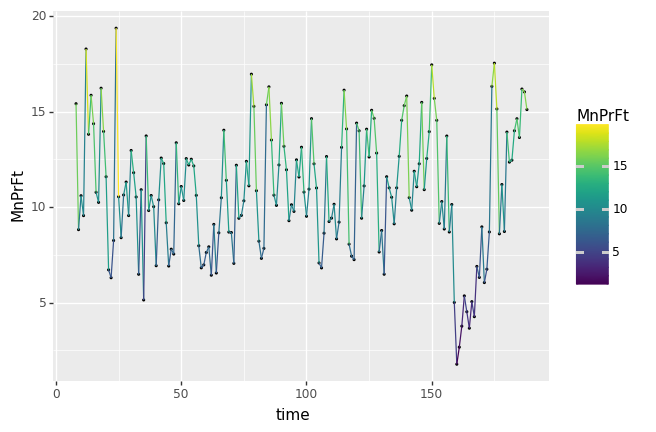

<ggplot: (8789260840861)>